In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# --- Step 1: Load data ---
df = pd.read_csv('Lab 23 Wholesale customers data.csv')

In [2]:
# Display first few rows
print("Dataset:\n", df.head())

Dataset:
    Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185


In [3]:

# --- Step 2: Select numeric columns for clustering ---
# (We remove 'Channel' and 'Region' since they are category IDs)
X = df[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']]

# --- Step 3: Standardize data ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- Step 4: Apply K-Means ---
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# --- Step 5: Display clustered data ---
print("\nClustered Data:")
print(df[['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen','Cluster']])


Clustered Data:
     Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicassen  Cluster
0    12669   9656     7561     214              2674        1338        0
1     7057   9810     9568    1762              3293        1776        0
2     6353   8808     7684    2405              3516        7844        0
3    13265   1196     4221    6404               507        1788        0
4    22615   5410     7198    3915              1777        5185        1
..     ...    ...      ...     ...               ...         ...      ...
435  29703  12051    16027   13135               182        2204        1
436  39228   1431      764    4510                93        2346        1
437  14531  15488    30243     437             14841        1867        2
438  10290   1981     2232    1038               168        2125        0
439   2787   1698     2510      65               477          52        0

[440 rows x 7 columns]


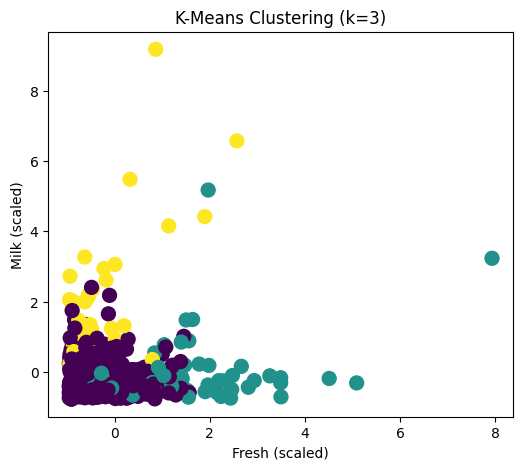

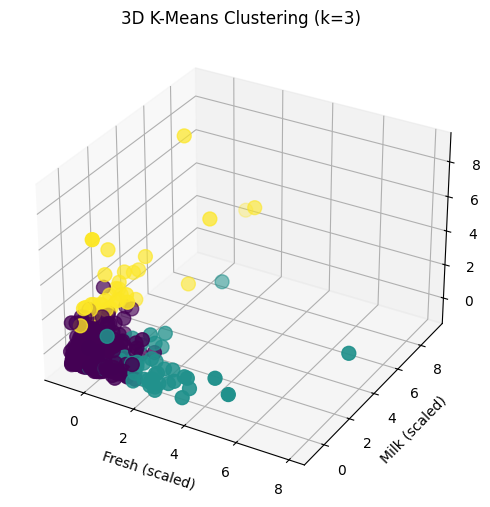

In [5]:
# --- Step 6: Visualize (optional 2D view using first 2 features) ---
plt.figure(figsize=(6,5))
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=df['Cluster'], cmap='viridis', s=100)
plt.xlabel('Fresh (scaled)')
plt.ylabel('Milk (scaled)')
plt.title('K-Means Clustering (k=3)')
plt.show()

# 3D Visualization (optional)
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_scaled[:,0], X_scaled[:,1], X_scaled[:,2], c=df['Cluster'], cmap='viridis', s=100)
ax.set_xlabel('Fresh (scaled)')
ax.set_ylabel('Milk (scaled)')
ax.set_zlabel('Grocery (scaled)')
ax.set_title('3D K-Means Clustering (k=3)')
plt.show()

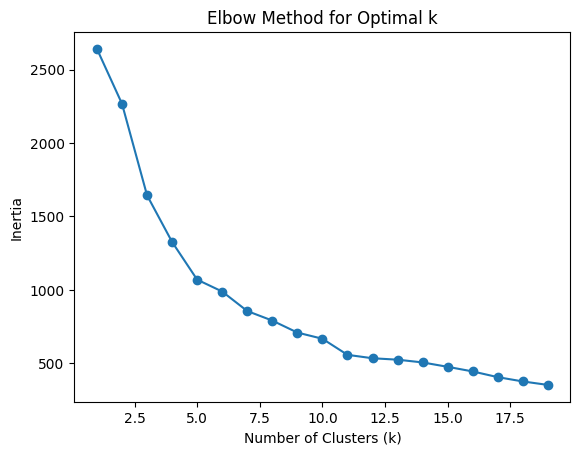

In [8]:
inertia = []
for k in range(1, 20):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.plot(range(1, 20), inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()



Clustered Data:
     Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicassen  Cluster
0    12669   9656     7561     214              2674        1338        0
1     7057   9810     9568    1762              3293        1776        0
2     6353   8808     7684    2405              3516        7844        6
3    13265   1196     4221    6404               507        1788        8
4    22615   5410     7198    3915              1777        5185        4
..     ...    ...      ...     ...               ...         ...      ...
435  29703  12051    16027   13135               182        2204        8
436  39228   1431      764    4510                93        2346        2
437  14531  15488    30243     437             14841        1867        7
438  10290   1981     2232    1038               168        2125        9
439   2787   1698     2510      65               477          52        9

[440 rows x 7 columns]


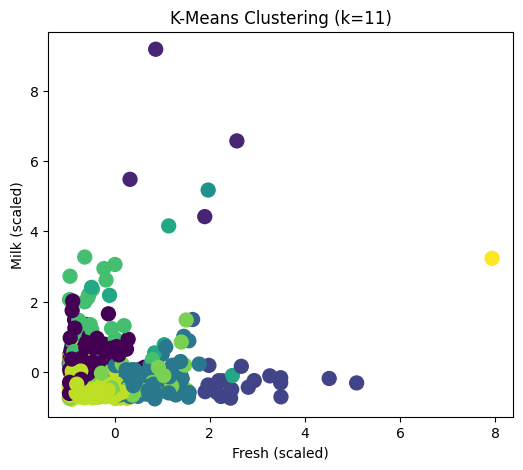

In [10]:
#Cluster = 11
kmeans = KMeans(n_clusters=11, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)
# --- Step 5: Display clustered data ---
print("\nClustered Data:")
print(df[['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen','Cluster']])

#visualization
plt.figure(figsize=(6,5))
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=df['Cluster'], cmap='viridis', s=100)
plt.xlabel('Fresh (scaled)')
plt.ylabel('Milk (scaled)')
plt.title('K-Means Clustering (k=11)')
plt.show()
